In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import os
import time

In [3]:
def get_KS_dist(cdf,cdf_ref,tcf_ref,n_res):
    # cdf1 and cdf2 should be evaluated at
    # similar time points

    distance = np.zeros(n_res)
    for i in range(n_res):
        m = np.gradient(tcf_ref[i,:])
        if np.where(m >= 0)[0].shape[0] == 0:
            cut = tcf_ref[:,0].shape[0]
        else:
            cut = np.where(m >= 0)[0][0]
        distance[i] = abs(cdf[:cut:1,i] - cdf_ref[i,:cut:1]).max()

    return distance


In [4]:
data_prefix='/content/drive/MyDrive/AF2_dynamics/calculated_data/'
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']

with open(f'{data_prefix}all_results.pkl','rb') as f:
    HA_tcf_calc=pickle.load(f)

In [9]:
tmp = HA_tcf_calc[0] | HA_tcf_calc[1]
HA_tcf_calc = tmp

In [18]:
HA_tcf_calc['3ttp']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]
HA_tcf_calc['2pc0']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]
HA_tcf_calc['1q9p']['AF2']['msas'] = [8, 16, 32, 64, 128, 256, 512]

In [10]:
HA_tcf_calc.keys(),HA_tcf_calc[sys_names[0]].keys(),HA_tcf_calc[sys_names[0]]['AF2'].keys(),HA_tcf_calc[sys_names[0]]['BioEMU'].keys()

(dict_keys(['1ebw', '4z4x', '6p9a', '3ttp', '2pc0', '1q9p']),
 dict_keys(['AF2', 'test', 'AFc', 'DiG', 'BioEMU', 'MD']),
 dict_keys(['non_scaled', 'scaled', 'CinvH', 'C', 'msas', 'n_samples', 't_axis']),
 dict_keys(['non_scaled', 'scaled', 'CinvH', 'C', 'msas', 'n_samples', 't_axis']))

# Only rMSA AF2

In [19]:
KS_distances={}
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']
barrier_type='scaled'
timescales=['1000ns','100ns','10ns']
nres_list = [99,99,95,99,99,99]
for ii,SYS in enumerate(sys_names):
    KS_distances[SYS]={}
    # trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')
    cdf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['cdf']
    print('========================================')

    for jj, timescale in enumerate(timescales):
        KS_distances[SYS][timescale]={}
        KS_distances[SYS][timescale]['dists']={}
        tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
        sim_cdfs = HA_tcf_calc[SYS]['test'][timescale]['cdf']

        for mm,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):

            KS_distances[SYS][timescale]['dists'][msa] = get_KS_dist(cdf=cdf_list[mm],
                                                            cdf_ref=sim_cdfs.T,
                                                            tcf_ref=tcf_ref,
                                                            n_res=nres_list[ii])
            print(f"Processed SYS:{SYS}, MSA:{msa}, TIMESCALE:{timescale}")

Processed SYS:3ttp, MSA:8, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:16, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:32, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:64, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:128, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:256, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:512, TIMESCALE:1000ns
Processed SYS:3ttp, MSA:8, TIMESCALE:100ns
Processed SYS:3ttp, MSA:16, TIMESCALE:100ns
Processed SYS:3ttp, MSA:32, TIMESCALE:100ns
Processed SYS:3ttp, MSA:64, TIMESCALE:100ns
Processed SYS:3ttp, MSA:128, TIMESCALE:100ns
Processed SYS:3ttp, MSA:256, TIMESCALE:100ns
Processed SYS:3ttp, MSA:512, TIMESCALE:100ns
Processed SYS:3ttp, MSA:8, TIMESCALE:10ns
Processed SYS:3ttp, MSA:16, TIMESCALE:10ns
Processed SYS:3ttp, MSA:32, TIMESCALE:10ns
Processed SYS:3ttp, MSA:64, TIMESCALE:10ns
Processed SYS:3ttp, MSA:128, TIMESCALE:10ns
Processed SYS:3ttp, MSA:256, TIMESCALE:10ns
Processed SYS:3ttp, MSA:512, TIMESCALE:10ns
Processed SYS:2pc0, MSA:8, TIMESCALE:1000ns
Processed SYS:2pc0, MSA:16

=========================== 3ttp ===========================


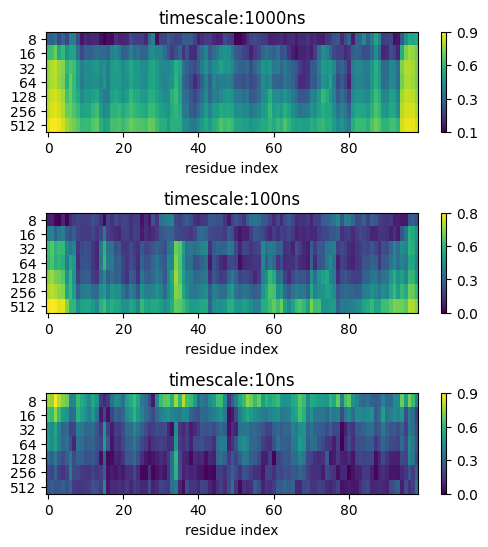

=========================== 2pc0 ===========================


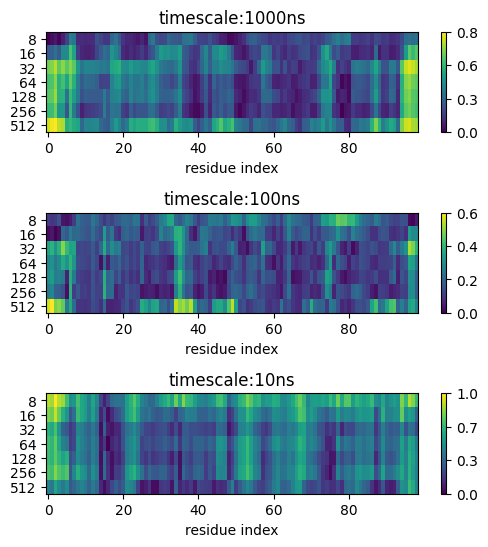

=========================== 1q9p ===========================


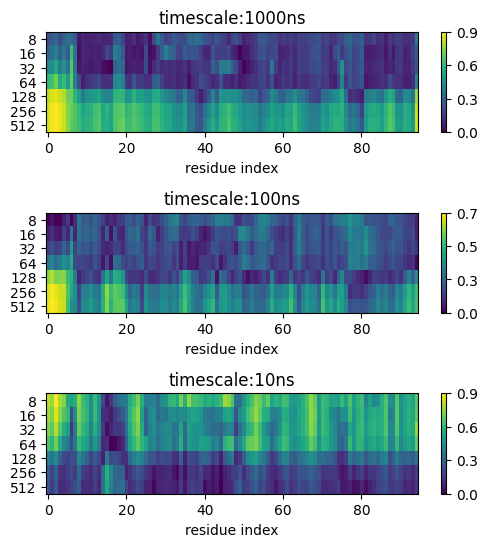

=========================== 1ebw ===========================


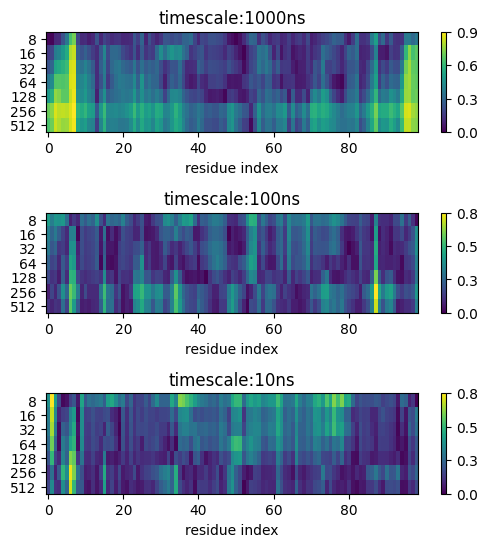

=========================== 4z4x ===========================


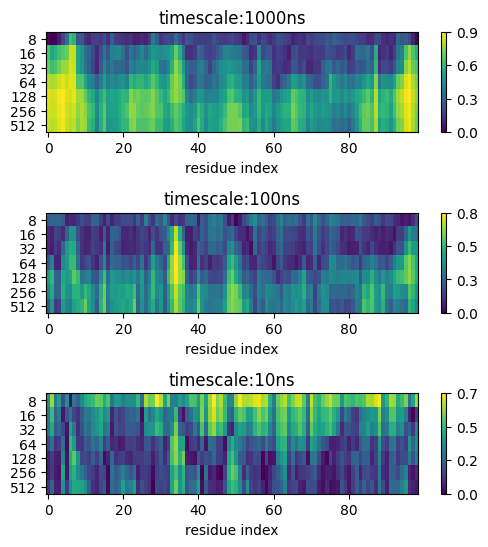

=========================== 6p9a ===========================


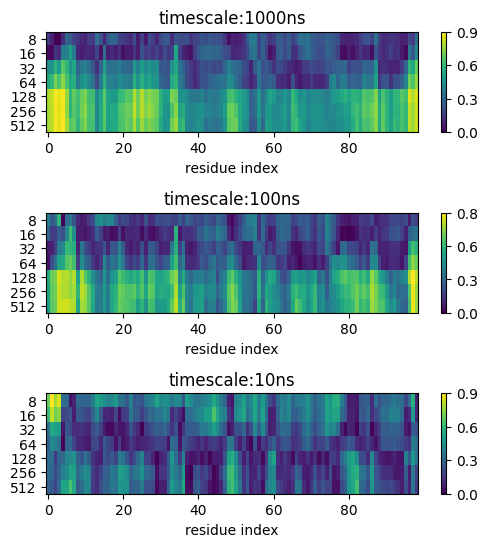

In [20]:
for ii,SYS in enumerate(sys_names):

    print(f'=========================== {SYS} ===========================')

    fig = plt.figure(figsize = (6, 6))
    for jj, timescale in enumerate(timescales):
        dummy=[]

        for kk, msa in enumerate(KS_distances[SYS][timescale]['dists'].keys()):
            dummy.append(KS_distances[SYS][timescale]['dists'][msa])

        dummy=np.array(dummy)

        msa_counts=np.zeros(len(KS_distances[SYS][timescale]['dists'].keys()))
        for rr in range(dummy.shape[1]):
            ind_min=np.where(dummy[:,rr]==dummy[:,rr].min())[0]
            msa_counts[ind_min]+=1
        msa_counts=msa_counts*100/dummy.shape[1]
        KS_distances[SYS][timescale]['explained'] = {}
        for kk, msa in enumerate(KS_distances[SYS][timescale]['dists'].keys()):
            KS_distances[SYS][timescale]['explained'][msa]=msa_counts[kk]

        plt.subplot(len(timescales),1,jj+1)
        plt.imshow(dummy, aspect = 'auto')
        ticks=np.linspace(dummy.min(),dummy.max(),4)
        cb=plt.colorbar(ticks=ticks)
        plt.yticks(ticks = np.arange(len(KS_distances[SYS][timescale]['dists'].keys())), labels = [str(m) for m in KS_distances[SYS][timescale]['dists'].keys()])
        plt.xlabel('residue index')
        plt.title(f'timescale:{timescale}')
        cb.set_ticks(ticks=ticks,labels=[str(np.round(ti,1)) for ti in ticks])
#         cb.set_ticklabels(ticks,[str(np.round(ti,1)) for ti in ticks])
    plt.subplots_adjust(hspace=0.8)
    plt.savefig(f'/content/drive/MyDrive/AF2_dynamics/figures/KS_matrices_{SYS}.pdf', dpi = 300)
    plt.show()
    plt.close()


=========================== 1ebw ===========================


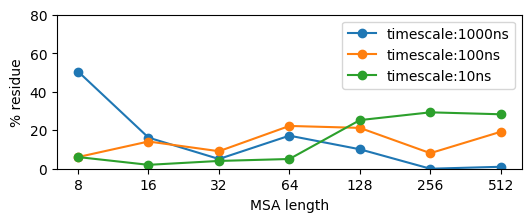

=========================== 4z4x ===========================


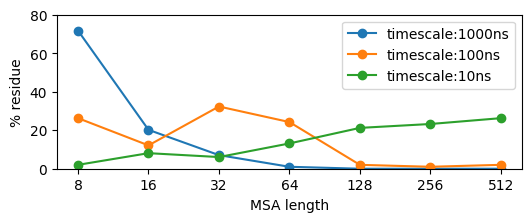

=========================== 6p9a ===========================


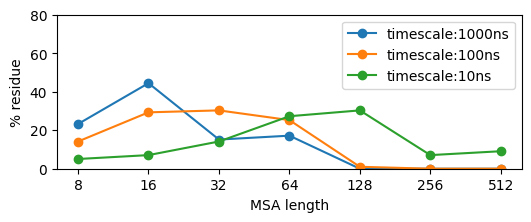

In [ ]:
for ii,SYS in enumerate(sys_names):

    print(f'=========================== {SYS} ===========================')

    fig = plt.figure(figsize = (6, 2))
    for jj, timescale in enumerate(timescales):
        dummy=[]

        for kk, msa in enumerate(KS_distances[SYS][timescale]['explained'].keys()):
            dummy.append(KS_distances[SYS][timescale]['explained'][msa])

        dummy=np.array(dummy)

        plt.plot(dummy, '-o',label=f'timescale:{timescale}')
        plt.xticks(ticks = np.arange(len(KS_distances[SYS][timescale]['explained'].keys())), labels = [str(m) for m in KS_distances[SYS][timescale]['explained'].keys()])
    plt.legend()
    plt.xlabel('MSA length')
    plt.ylim([0,80])
    plt.ylabel('% residue');
    plt.show()
    plt.close()

# All methods

In [21]:
KS_distances={}
sys_names=['3ttp', '2pc0', '1q9p', '1ebw','4z4x','6p9a']
barrier_type='scaled'
timescales=['1000ns','100ns','10ns']
methods_req=['AF2_8','AF2_64','AF2_512','AFc','BioEMU','DiG']
nres_list = [99,99,95,99,99,99]
msas_req=[8,64]
# methods_req=['AF2','MD','AFc','BioEMU','DiG']
for ii,SYS in enumerate(sys_names):
    KS_distances[SYS]={}
    # trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')
    print('========================================')

    for jj, timescale in enumerate(timescales):
        KS_distances[SYS][timescale]={}
        KS_distances[SYS][timescale]['dists']={}
        tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
        sim_cdfs = HA_tcf_calc[SYS]['test'][timescale]['cdf']

        for mm,meth in enumerate(methods_req):
            if meth.split('_')[0] != 'AF2':
                cdf_list = HA_tcf_calc[SYS][meth][barrier_type]['cdf']
                KS_distances[SYS][timescale]['dists'][meth] = get_KS_dist(cdf=cdf_list[0],
                                                                          cdf_ref=sim_cdfs.T,
                                                                          tcf_ref=tcf_ref,
                                                                          n_res=nres_list[ii])
                print(f"Processed SYS:{SYS}, Method:{meth}, TIMESCALE:{timescale}")
            else:
                cdf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['cdf']
                for nn,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
                    if msa in [int(meth.split('_')[1])]:
                        KS_distances[SYS][timescale]['dists'][meth] = get_KS_dist(cdf=cdf_list[nn],
                                                                                  cdf_ref=sim_cdfs.T,
                                                                                  tcf_ref=tcf_ref,
                                                                                  n_res=nres_list[ii])
                        print(f"Processed SYS:{SYS}, Method:{meth}, MSA:{msa}, TIMESCALE:{timescale}")

Processed SYS:3ttp, Method:AF2_8, MSA:8, TIMESCALE:1000ns
Processed SYS:3ttp, Method:AF2_64, MSA:64, TIMESCALE:1000ns
Processed SYS:3ttp, Method:AF2_512, MSA:512, TIMESCALE:1000ns
Processed SYS:3ttp, Method:AFc, TIMESCALE:1000ns
Processed SYS:3ttp, Method:BioEMU, TIMESCALE:1000ns
Processed SYS:3ttp, Method:DiG, TIMESCALE:1000ns
Processed SYS:3ttp, Method:AF2_8, MSA:8, TIMESCALE:100ns
Processed SYS:3ttp, Method:AF2_64, MSA:64, TIMESCALE:100ns
Processed SYS:3ttp, Method:AF2_512, MSA:512, TIMESCALE:100ns
Processed SYS:3ttp, Method:AFc, TIMESCALE:100ns
Processed SYS:3ttp, Method:BioEMU, TIMESCALE:100ns
Processed SYS:3ttp, Method:DiG, TIMESCALE:100ns
Processed SYS:3ttp, Method:AF2_8, MSA:8, TIMESCALE:10ns
Processed SYS:3ttp, Method:AF2_64, MSA:64, TIMESCALE:10ns
Processed SYS:3ttp, Method:AF2_512, MSA:512, TIMESCALE:10ns
Processed SYS:3ttp, Method:AFc, TIMESCALE:10ns
Processed SYS:3ttp, Method:BioEMU, TIMESCALE:10ns
Processed SYS:3ttp, Method:DiG, TIMESCALE:10ns
Processed SYS:2pc0, Method:A

=========================== 3ttp ===========================


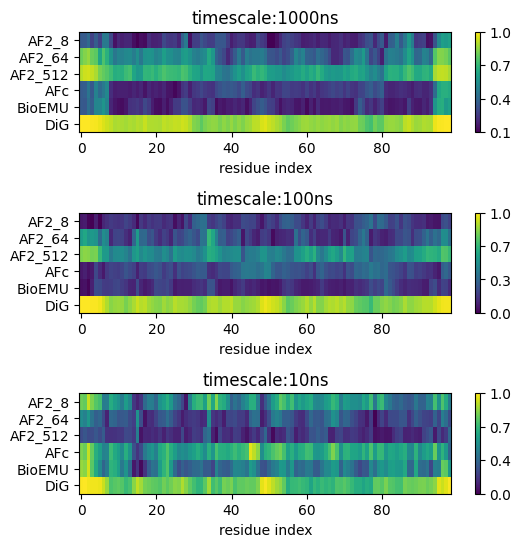

=========================== 2pc0 ===========================


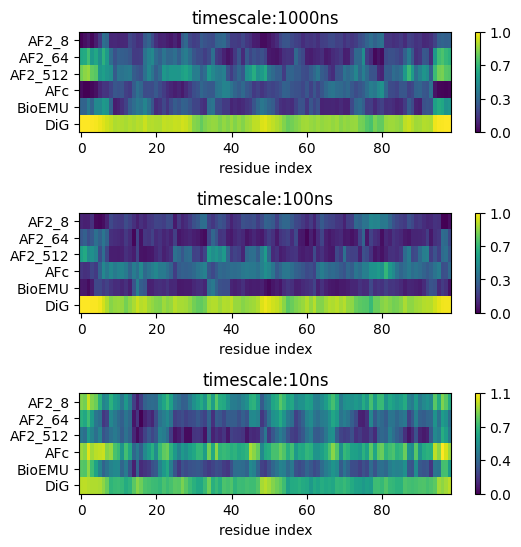

=========================== 1q9p ===========================


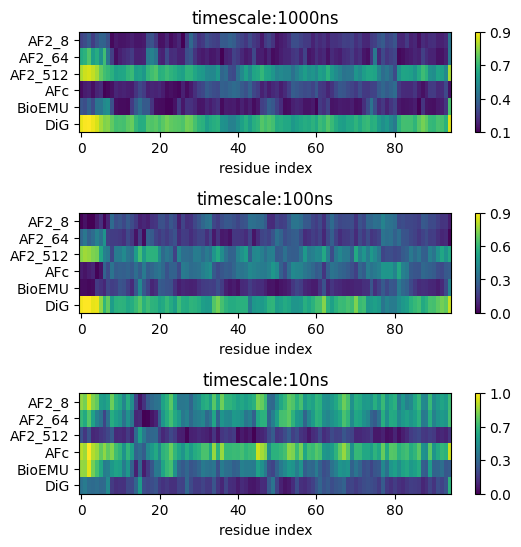

=========================== 1ebw ===========================


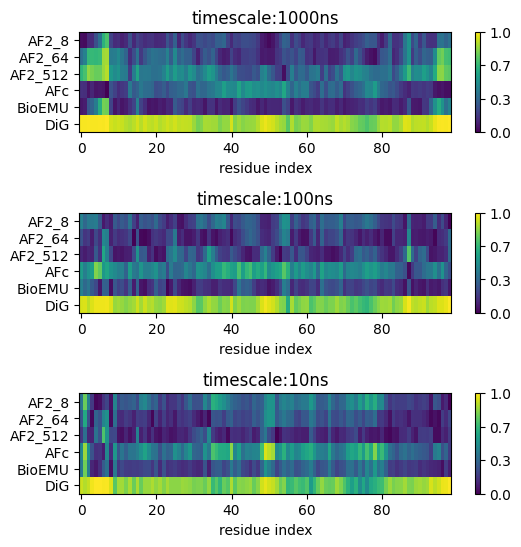

=========================== 4z4x ===========================


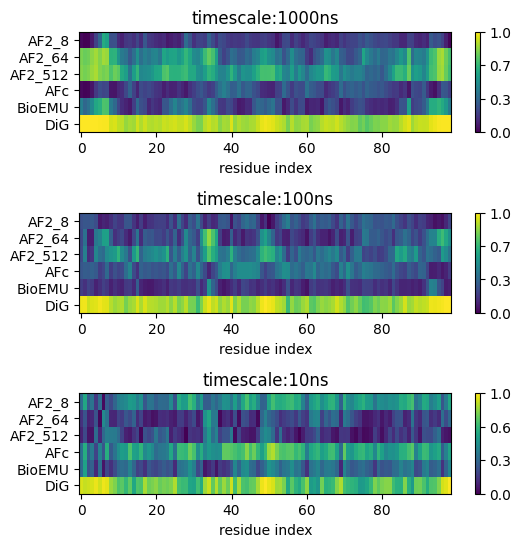

=========================== 6p9a ===========================


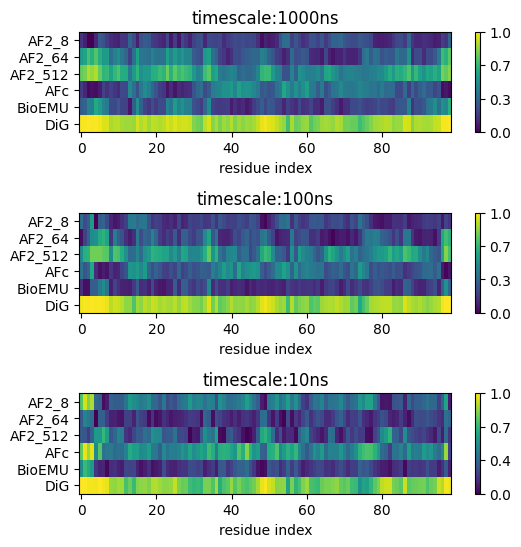

In [22]:
methods_req=['AF2_8','AF2_64','AF2_512','AFc','BioEMU','DiG']
for ii,SYS in enumerate(sys_names):

    print(f'=========================== {SYS} ===========================')

    fig = plt.figure(figsize = (6, 6))
    for jj, timescale in enumerate(timescales):
        dummy=[]

        for kk, meth in enumerate(methods_req):
            dummy.append(KS_distances[SYS][timescale]['dists'][meth])

        dummy=np.array(dummy)

        msa_counts=np.zeros(len(KS_distances[SYS][timescale]['dists'].keys()))
        for rr in range(dummy.shape[1]):
            ind_min=np.where(dummy[:,rr]==dummy[:,rr].min())[0]
            msa_counts[ind_min]+=1
        msa_counts=msa_counts*100/dummy.shape[1]
        KS_distances[SYS][timescale]['explained'] = {}
        for kk, meth in enumerate(methods_req):
            KS_distances[SYS][timescale]['explained'][meth]=msa_counts[kk]

        plt.subplot(len(timescales),1,jj+1)
        plt.imshow(dummy, aspect = 'auto')
        ticks=np.linspace(dummy.min(),dummy.max(),4)
        cb=plt.colorbar(ticks=ticks)
        plt.yticks(ticks = np.arange(len(KS_distances[SYS][timescale]['dists'].keys())), labels = [m for m in KS_distances[SYS][timescale]['dists'].keys()])
        plt.xlabel('residue index')
        plt.title(f'timescale:{timescale}')
        cb.set_ticks(ticks=ticks,labels=[str(np.round(ti,1)) for ti in ticks])
#         cb.set_ticklabels(ticks,[str(np.round(ti,1)) for ti in ticks])
    plt.subplots_adjust(hspace=0.8)
    plt.savefig(f'/content/drive/MyDrive/AF2_dynamics/figures/all_methods_KS_matrices_{SYS}.pdf', dpi = 300)
    plt.show()
    plt.close()


=========================== 1ebw ===========================


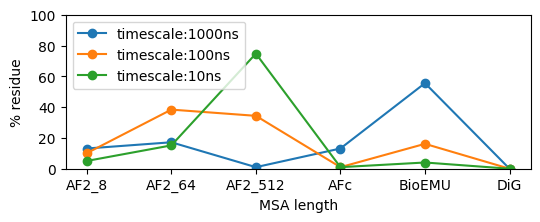

=========================== 4z4x ===========================


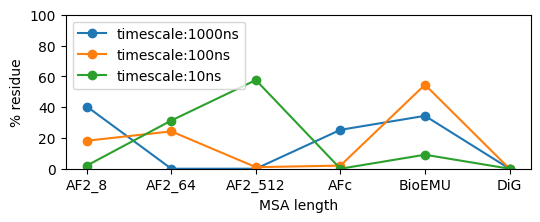

=========================== 6p9a ===========================


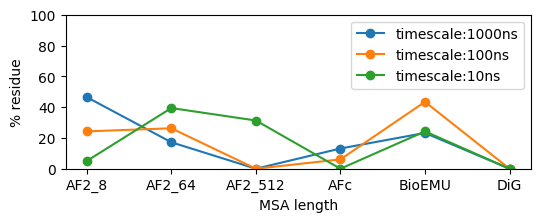

In [ ]:
for ii,SYS in enumerate(sys_names):

    print(f'=========================== {SYS} ===========================')

    fig = plt.figure(figsize = (6, 2))
    for jj, timescale in enumerate(timescales):
        dummy=[]

        for kk, meth in enumerate(KS_distances[SYS][timescale]['explained'].keys()):
            dummy.append(KS_distances[SYS][timescale]['explained'][meth])

        dummy=np.array(dummy)

        plt.plot(dummy, '-o',label=f'timescale:{timescale}')
        plt.xticks(ticks = np.arange(len(KS_distances[SYS][timescale]['explained'].keys())), labels = [m for m in KS_distances[SYS][timescale]['explained'].keys()])
    plt.legend()
    plt.xlabel('MSA length')
    plt.ylim([0,100])
    plt.ylabel('% residue');
    plt.show()
    plt.close()

# Including MD samples in all methods

In [ ]:
KS_distances={}
sys_names=['1ebw','4z4x','6p9a']
barrier_type='scaled'
timescales=['1000ns','100ns','10ns']

msas_req=[8]
methods_req=['AF2','MD','AFc','BioEMU','DiG']
for ii,SYS in enumerate(sys_names):
    KS_distances[SYS]={}
    # trj=md.load(f'/data/aranganathana2/AF2/Dynamics/topol_{SYS}.pdb')
    print('========================================')

    for jj, timescale in enumerate(timescales):
        KS_distances[SYS][timescale]={}
        KS_distances[SYS][timescale]['dists']={}
        tcf_ref = HA_tcf_calc[SYS]['test'][timescale]['tcf'].T[1:]
        sim_cdfs = HA_tcf_calc[SYS]['test'][timescale]['cdf']

        for mm,meth in enumerate(methods_req):
            if meth != 'AF2':
                cdf_list = HA_tcf_calc[SYS][meth][barrier_type]['cdf']
                KS_distances[SYS][timescale]['dists'][meth] = get_KS_dist(cdf=cdf_list[0],
                                                                          cdf_ref=sim_cdfs.T,
                                                                          tcf_ref=tcf_ref,
                                                                          n_res=99)
                print(f"Processed SYS:{SYS}, Method:{meth}, TIMESCALE:{timescale}")
            else:
                cdf_list = HA_tcf_calc[SYS]['AF2'][barrier_type]['cdf']
                for nn,msa in enumerate(HA_tcf_calc[SYS]['AF2']['msas']):
                    if msa in msas_req:
                        KS_distances[SYS][timescale]['dists'][meth] = get_KS_dist(cdf=cdf_list[nn],
                                                                                  cdf_ref=sim_cdfs.T,
                                                                                  tcf_ref=tcf_ref,
                                                                                  n_res=99)
                        print(f"Processed SYS:{SYS}, Method:{meth}, MSA:{msa}, TIMESCALE:{timescale}")

Processed SYS:1ebw, Method:AF2, MSA:8, TIMESCALE:1000ns
Processed SYS:1ebw, Method:MD, TIMESCALE:1000ns
Processed SYS:1ebw, Method:AFc, TIMESCALE:1000ns
Processed SYS:1ebw, Method:BioEMU, TIMESCALE:1000ns
Processed SYS:1ebw, Method:DiG, TIMESCALE:1000ns
Processed SYS:1ebw, Method:AF2, MSA:8, TIMESCALE:100ns
Processed SYS:1ebw, Method:MD, TIMESCALE:100ns
Processed SYS:1ebw, Method:AFc, TIMESCALE:100ns
Processed SYS:1ebw, Method:BioEMU, TIMESCALE:100ns
Processed SYS:1ebw, Method:DiG, TIMESCALE:100ns
Processed SYS:1ebw, Method:AF2, MSA:8, TIMESCALE:10ns
Processed SYS:1ebw, Method:MD, TIMESCALE:10ns
Processed SYS:1ebw, Method:AFc, TIMESCALE:10ns
Processed SYS:1ebw, Method:BioEMU, TIMESCALE:10ns
Processed SYS:1ebw, Method:DiG, TIMESCALE:10ns
Processed SYS:4z4x, Method:AF2, MSA:8, TIMESCALE:1000ns
Processed SYS:4z4x, Method:MD, TIMESCALE:1000ns
Processed SYS:4z4x, Method:AFc, TIMESCALE:1000ns
Processed SYS:4z4x, Method:BioEMU, TIMESCALE:1000ns
Processed SYS:4z4x, Method:DiG, TIMESCALE:1000ns

=========================== 1ebw ===========================


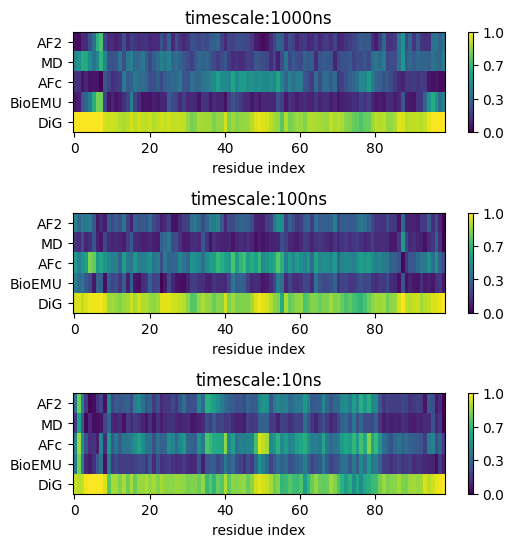

=========================== 4z4x ===========================


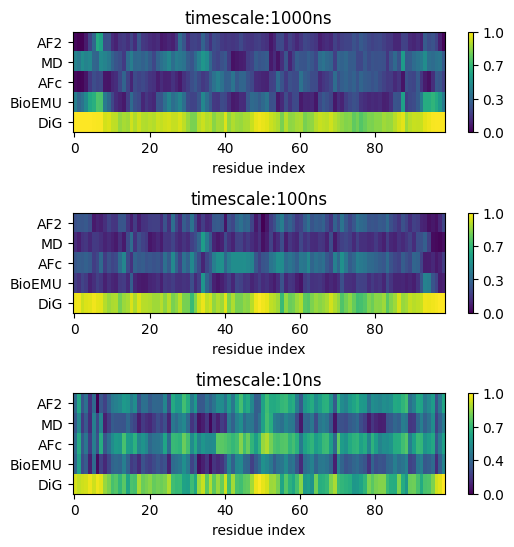

=========================== 6p9a ===========================


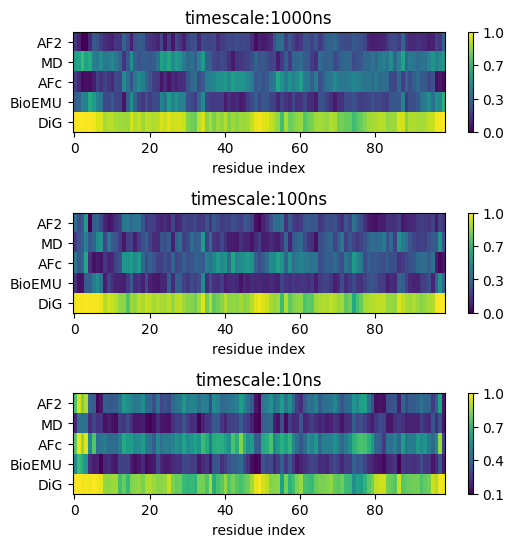

In [ ]:
methods_req=['AF2','MD','AFc','BioEMU','DiG']
for ii,SYS in enumerate(sys_names):

    print(f'=========================== {SYS} ===========================')

    fig = plt.figure(figsize = (6, 6))
    for jj, timescale in enumerate(timescales):
        dummy=[]

        for kk, meth in enumerate(methods_req):
            dummy.append(KS_distances[SYS][timescale]['dists'][meth])

        dummy=np.array(dummy)

        msa_counts=np.zeros(len(KS_distances[SYS][timescale]['dists'].keys()))
        for rr in range(dummy.shape[1]):
            ind_min=np.where(dummy[:,rr]==dummy[:,rr].min())[0]
            msa_counts[ind_min]+=1
        msa_counts=msa_counts*100/dummy.shape[1]
        KS_distances[SYS][timescale]['explained'] = {}
        for kk, meth in enumerate(methods_req):
            KS_distances[SYS][timescale]['explained'][meth]=msa_counts[kk]

        plt.subplot(len(timescales),1,jj+1)
        plt.imshow(dummy, aspect = 'auto')
        ticks=np.linspace(dummy.min(),dummy.max(),4)
        cb=plt.colorbar(ticks=ticks)
        plt.yticks(ticks = np.arange(len(KS_distances[SYS][timescale]['dists'].keys())), labels = [m for m in KS_distances[SYS][timescale]['dists'].keys()])
        plt.xlabel('residue index')
        plt.title(f'timescale:{timescale}')
        cb.set_ticks(ticks=ticks,labels=[str(np.round(ti,1)) for ti in ticks])
#         cb.set_ticklabels(ticks,[str(np.round(ti,1)) for ti in ticks])
    plt.subplots_adjust(hspace=0.8)
    plt.show()
    plt.close()
